In [ ]:
'''

In real world , u may have to collect data from various sources :

CSV/Excel
TSV
JSON
Scrap data from some website

Databases(SQL , NoSQL)

Big Data systems: Spark / Hadoop


'''

# Read & write CSV !

In [ ]:
'''

What is CSV ?
CSV stands for Comma-Separated Values ( it means rows & columns are separated using comma separator[,] )

✅ Example:
Name,Age,City
Shan,23,Pune


& thats how CSV looks like if you open it in any text editor application like Notepad !


'''

In [ ]:
'''
Lets ask LLM/GenAI to generate code to read a csv file !

'''

In [33]:
from langchain_google_genai import GoogleGenerativeAI

In [34]:
llm = GoogleGenerativeAI(
    api_key = gemini_api_key,
    model = "gemini-2.5-flash",
    temperature=0.0
)


## temperature = 0.2 means Output is Slightly flexible & can have Stable answers..

In [15]:
# Simple prompt
prompt = "Give me beginner friendly Python(pandas) code to read a csv file"

In [16]:
response = llm.invoke(prompt)

print(response)

You're in the right place! Pandas is incredibly powerful for working with data, and reading CSVs is one of its most fundamental operations.

Here's a beginner-friendly guide to reading a CSV file using Python and Pandas, step-by-step.

---

### Step 0: Make sure you have Pandas installed

If you don't have Pandas installed yet, open your terminal or command prompt and run this command:

```bash
pip install pandas
```

### Step 1: Import the Pandas library

Every time you want to use Pandas in your Python script or Jupyter Notebook, you need to import it. The standard convention is to import it as `pd`.

```python
import pandas as pd
```

### Step 2: Create a Sample CSV File (for practice)

To make this example runnable for you, let's first create a simple CSV file. You can either:

**Option A: Manually create a file**
1. Open a plain text editor (like Notepad on Windows, TextEdit on Mac, or VS Code).
2. Copy and paste the following text into it:
   ```csv
   Name,Age,City
   Alice,30,N

In [ ]:
!pip install pandas

In [1]:
import pandas as pd

In [8]:
## df = pd.read_csv(r"C:\Users\shant\_14.. Entire_GenAI_Projects\Udemy\GenAI_for_Data_Analytics\Datasets/sales_data_sample.csv" , encoding="latin1")

df = pd.read_csv(r"C:\Users\shant\_14.. Entire_GenAI_Projects\Udemy\GenAI_for_Data_Analytics\Datasets/sales_data_sample.csv" , 
                 encoding_errors="ignore")

In [ ]:
'''
raw string will help pandas to consider file path as it :


In Windows paths, we use backslashes \ in file_path
In Mac & Linux OS , we use / in file path

& this makes file structuring so confusing , so just to overcome this , u can add raw string before file path 
which tell pandas to read file as it is !


'''

In [ ]:
'''

Pandas by default tries to read the file in UTF-8 encoding.

But your CSV file is saved in a different encoding (mostly latin1 / cp1252 / ISO-8859-1), 
so UTF-8 can’t decode some bytes → UnicodeDecodeError.

So try with "latin1"
df = pd.read_csv(r"C:\Users\shant\_14.. Entire_GenAI_Projects\Udemy\GenAI_for_Data_Analytics\Datasets/sales_data_sample.csv" , encoding="latin1")


If you don’t care about those special characters which UTF-8 cant decode , u can ignore those chars :
df = pd.read_csv(r"C:\Users\shant\_14.. Entire_GenAI_Projects\Udemy\GenAI_for_Data_Analytics\Datasets/sales_data_sample.csv",
                 encoding_errors="ignore")

'''

In [9]:
type(df)

pandas.core.frame.DataFrame

    Its all about data in the form of Rows & colums  ,ie It is exactly equal to csv data (excel)
    If you're familiar with the Table in Excel then you already have a grasp of what a Pandas dataframe is. It's a table of data. It has rows and columns
    Its 2-D data structure
    Its like a Table or a matrix

In [17]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [18]:
df_small = df[['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH',
       'SALES', 'ORDERDATE', 'STATUS']]

In [23]:
# Save as new CSV
df_small.to_csv(r"C:\Users\shant\_14.. Entire_GenAI_Projects\Udemy\GenAI_for_Data_Analytics\Datasets/sales_data_clean.csv", index=False)


# Read & export Excel !

In [ ]:
'''

Now u may ask : what an Excel is ?

Excel in short is about information stored in an Excel workbook (.xlsx) in the form of rows and columns..
It can have multiple sheets in one file..



just to make it a little clearer : 

Excel is like a entire colourful notebook/book 📘where you can have many pages/multiple sheets..
CSV is like a single plain page 📄



'''

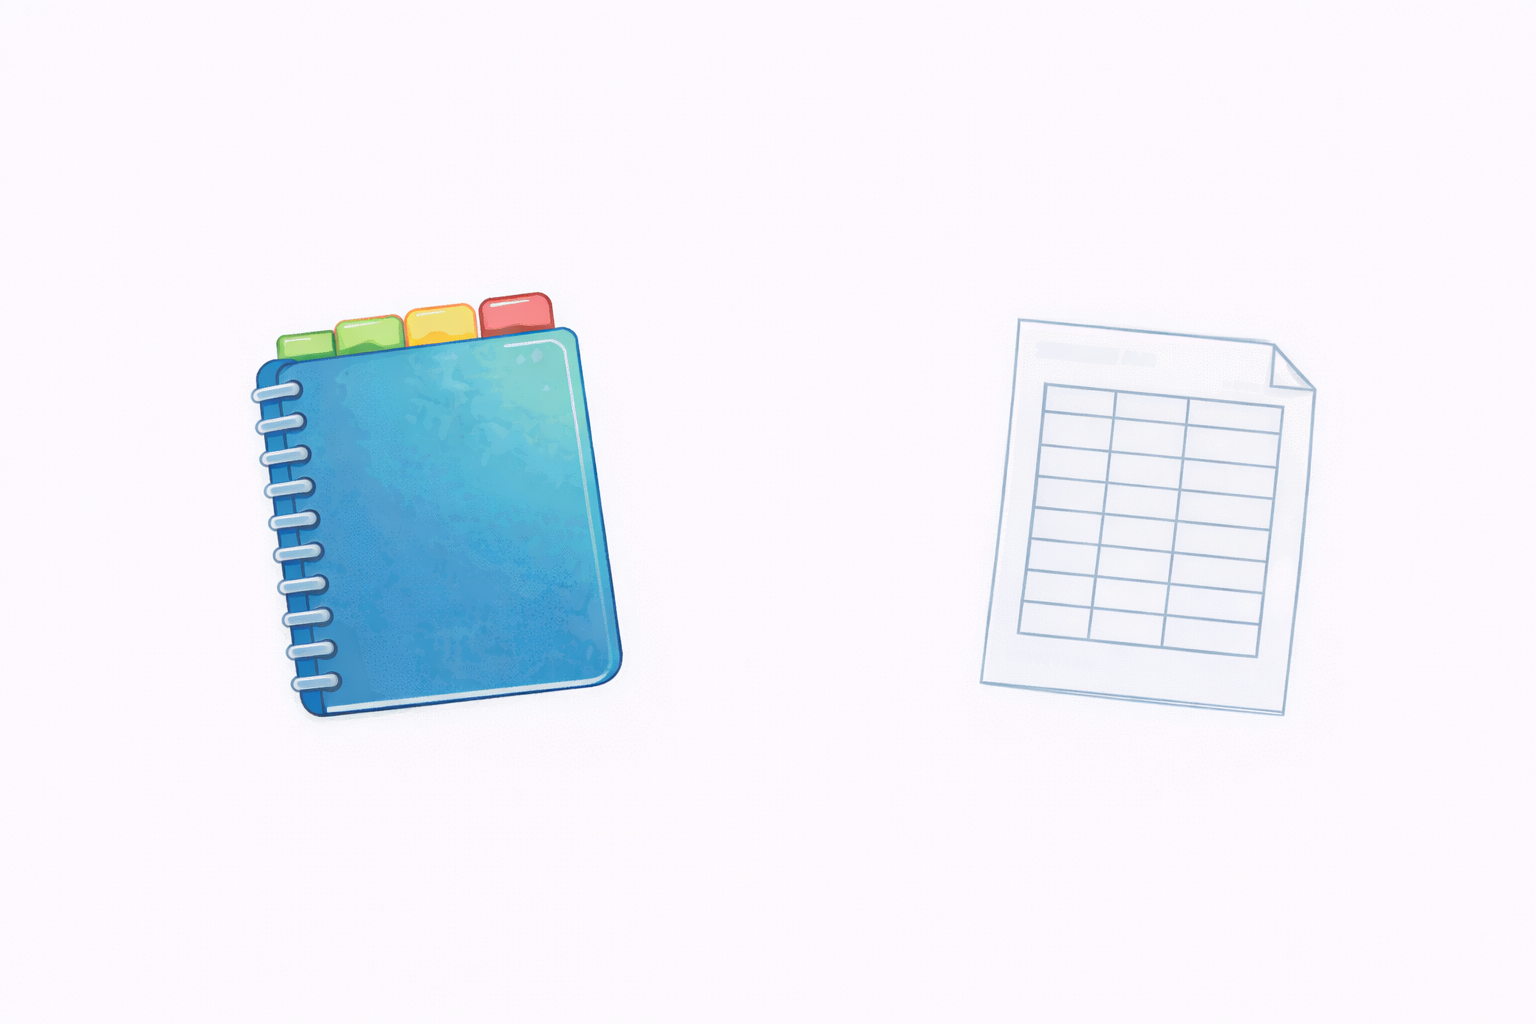

In [43]:
## takes 5-10 sec 

from langchain_groq import ChatGroq

llm = ChatGroq(
    model="openai/gpt-oss-120b", ## u can use some other models as well.. (just copy model from console.groq.com/playground)
    temperature = 0,
    groq_api_key = groq_api_key
)

In [ ]:
'''

lets design an effective prompt which can give the code to read and excel file..

'''

In [44]:
# Simple prompt
prompt = f'''

Give me beginner friendly Python(pandas) code to read a excel file
No comments


'''

In [45]:
response = llm.invoke(prompt)
print(response.content)

```python
import pandas as pd

df = pd.read_excel('your_file.xlsx')
print(df.head())
```


In [22]:
# !pip install openpyxl

In [37]:
df_excel = pd.read_excel(r"C:\Users\shant\_14.. Entire_GenAI_Projects\Udemy\GenAI_for_Data_Analytics\Datasets/sales_data.xlsx")

In [38]:
df_excel.head(3)

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   

        ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0  2/24/2003 0:00  Shipped       1         2     2003  ...   
1   5/7/2003 0:00  Shipped       2         5     2003  ...   
2   7/1/2003 0:00  Shipped       3         7     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2   CITY STATE POSTALCODE  \
0        897 Long Airport Avenue           NaN    NYC    NY      10022   
1             59 rue de l'Abbaye           NaN  Reims   NaN      51100   
2  27 rue du Colonel Pierre Avia           NaN  Paris   NaN      75508   

  COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0     USA       NaN              Yu             Kwai    Small  
1  France      EMEA         Henriot             Paul    Small  
2  France      EMEA        Da Cunha           Daniel   Medium  

[3 rows x 25 columns]

In [ ]:
## storing dataframe into excel notebook !

In [ ]:
df.to_excel(r"C:\Users\shant\_14.. Entire_GenAI_Projects\Udemy\GenAI_for_Data_Analytics\Datasets/sales_report.xlsx", index=False)

# Work with JSON !

In [ ]:
'''

Lets understand what JSON is : 

'''

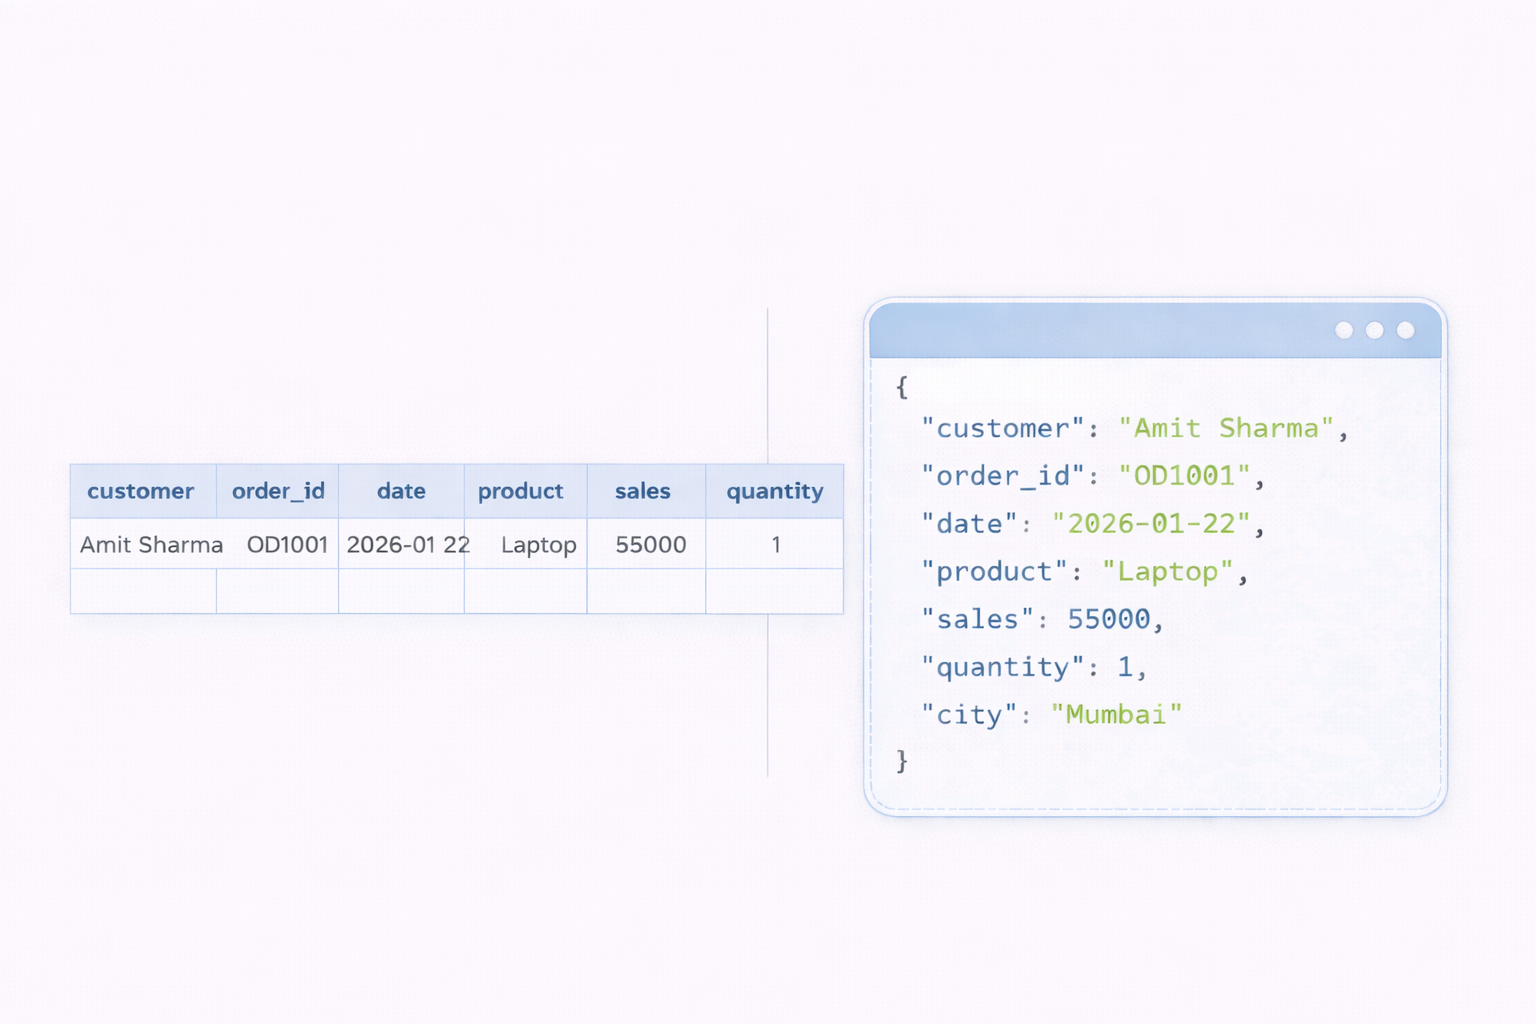

    Json(Javascript obj notation)
    
    JSON is that format which is Extensively used format in Industries in the context of web 
    to send data from one web server to another web server,
    
    in json , we represent our data in the form of key-value pairs..



In [ ]:
'''
In JSON , every row of CSV is represented using dictionary(key-value)
      where keys are columns
      values are respective values of col..

{
  "customer": "Amit Sharma",
  "order_id": "OD1001",
  "date": "2026-01-22",
  "product": "Laptop",
  "sales": 55000,
  "quantity": 1,
  "city": "Mumbai"
}



✅ Why convert sales data into JSON?

    Most apps/websites don’t send CSV files every time.
    They send data like this:

    📌 Example:

    Amazon website → backend server
    Payment gateway → server
    Delivery app → server

    👉 They mostly talk in JSON.


'''

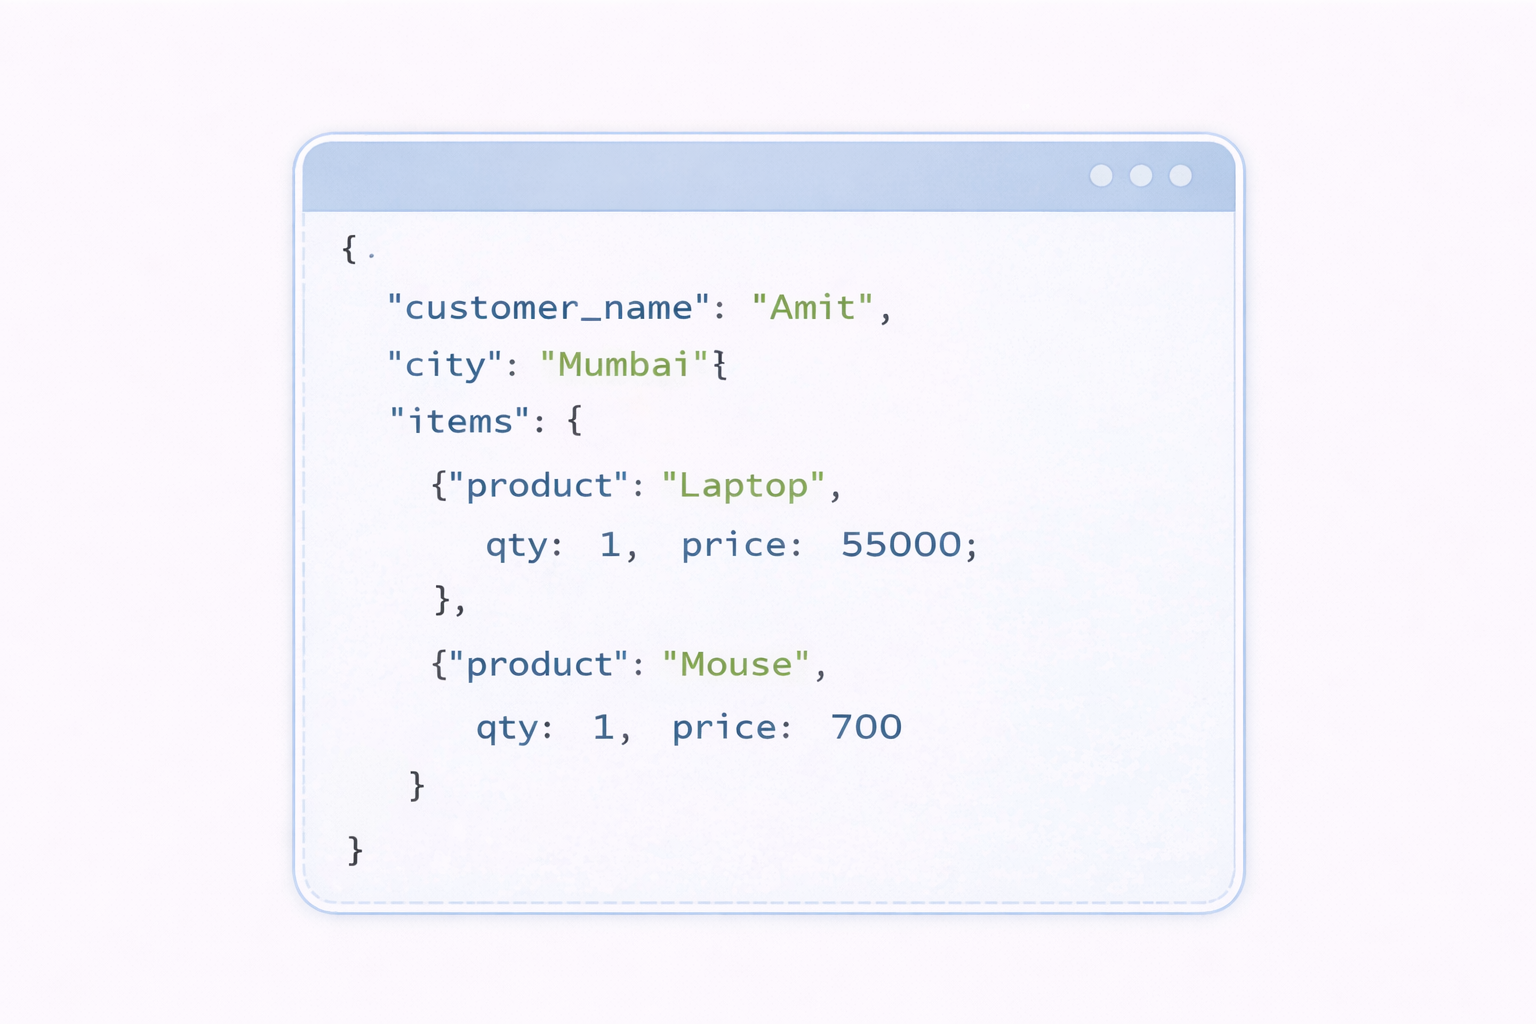

In [ ]:
'''


One major adv of using JSON is :
    JSON Supports nested / complex data (industry need)
    Real businesses store data like:

    customer info inside order,
    items list inside order,
    payment status, etc.
    
    
    {
      "customer": {"name": "Amit", "city": "Mumbai"},
      "items": [
        {"product": "Laptop", "qty": 1, "price": 55000},
        {"product": "Mouse", "qty": 1, "price": 700}
      ]
    }

    ✅ This is impossible in CSV in a clean way.



'''

In [ ]:
'''

Lets design prompt to generate code to read JSON file !

'''

In [46]:
# Simple prompt
prompt = f'''

Give me beginner friendly Python code to read a JSON file
No comments


'''

In [47]:
response = llm.invoke(prompt)
print(response.content)

```python
import json

with open("data.json", "r", encoding="utf-8") as f:
    data = json.load(f)

print(data)
```


In [49]:
import json ## import json lib to work with json data !

with open(r"C:\Users\shant\_14.. Entire_GenAI_Projects\Udemy\GenAI_for_Data_Analytics\Datasets/IN_category_id.json", "r", encoding="utf-8") as f:
    data = json.load(f)


In [ ]:
'''

"IN_category_id.json" first open this file
"r" = read mode ( ie you are reading data from this file)
utf-8 encoding :  so that English + symbols can be properly save into file
f : just a short name to file



json.load(f) : load "json file" content inside data


'''

In [50]:
data

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

# Work with Feather files !

        Feather is a binary file format that is used for storing data ..
        
        When we say Feather is a “binary file format”, it simply means:
        ✅ Data is saved in 0s and 1s (machine-readable form), not as human-readable text like CSV...
        
        
        Why binary format is used?
        Because Binary format is much faster and efficient than CSV..
        
        ✅ Benefits of Feather:

        ⚡ Very fast read/write
        📦 Smaller file size than CSV
        🧠 Keeps data types perfectly (int, float, datetime etc.)
            

In [ ]:
### In order to work with feather files , do install pyarrow package ..
## !pip install pyarrow


In [ ]:
all_data = pd.read_feather(r"R:\All_Datasets\4.. Sales Analysis/Sales_data.ftr")

In [ ]:
all_data.head(6)

In [ ]:
'''

The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost ,
purchase address, etc

'''

# Working with Text files !